# Desafio: Titanic

Prever se o passageiro sobreviveu ou não ao desastre do Titanic baseado em diversas variáveis, como classe, idade, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando dados e aprendendo a usar o DataFrame do Pandas

In [2]:
data = pd.read_csv('input/train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data.shape

(891, 12)

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
data['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [9]:
data[['Pclass', 'Age']].head()

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0


In [10]:
data.iloc[10:14]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.700,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.550,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.050,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S


In [11]:
data.iloc[10:14]['Age']

10     4.0
11    58.0
12    20.0
13    39.0
Name: Age, dtype: float64

In [12]:
data.iloc[10:14][['Age', 'Name']]

,Age,Name
10,4.0,"Sandstrom, Miss. Marguerite Rut"
11,58.0,"Bonnell, Miss. Elizabeth"
12,20.0,"Saundercock, Mr. William Henry"
13,39.0,"Andersson, Mr. Anders Johan"


In [13]:
data['Age'].mean()

29.69911764705882

In [14]:
data['Age'].min()

0.41999999999999998

In [15]:
data['Age'].max()

80.0

In [16]:
data.sample(n=4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
421,422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
364,365,0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.5000,NaN,Q


In [17]:
data[data['Sex'] == 'male'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [18]:
data[(data['Sex'] == 'male') & (data['Age'] > 30)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S


In [19]:
data.query('Sex == "male" & Age > 30').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S


## 1o passo: dividir dados em conjuntos de treinamento e validação

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train, val = train_test_split(data, train_size=0.8)

del data

## 2o passo: Análise de Dados Exploratória (por variável)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 804
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            576 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          164 non-null object
Embarked       710 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [23]:
train['Survived'].mean()

0.3946629213483146

### PassengerId

In [24]:
train['PassengerId'].nunique()

712

In [25]:
train = train.drop('PassengerId', axis=1)

Conclusão: remover.

### Pclass

In [26]:
train['Pclass'].value_counts()

3    384
1    174
2    154
Name: Pclass, dtype: int64

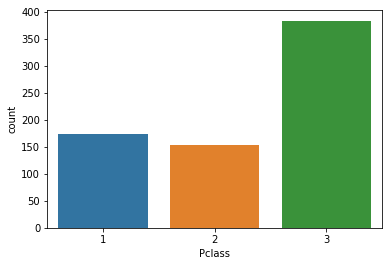

In [27]:
sns.countplot(train['Pclass'])
plt.show()

### Sex

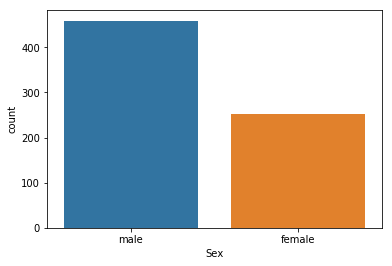

In [28]:
sns.countplot(train['Sex'])
plt.show()

In [29]:
map_dict = {'male': 1, 'female': 0}

train['Sex'] = train['Sex'].map(map_dict)

Conclusão: mapear 'female' => 0 e 'male' => 1

### Age

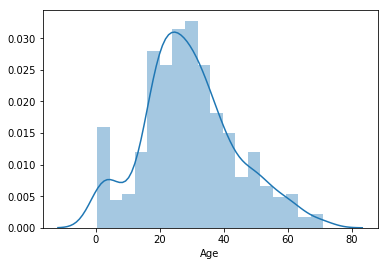

In [30]:
sns.distplot(train['Age'].dropna())
plt.show()

In [31]:
train['Age'].describe()

count    576.000000
mean      29.301510
std       14.488076
min        0.420000
25%       20.000000
50%       28.000000
75%       37.000000
max       71.000000
Name: Age, dtype: float64

### Name

In [32]:
train['Name'].head()

331              Partner, Mr. Austen
828     McCormack, Mr. Thomas Joseph
677          Turja, Miss. Anna Sofia
741    Cavendish, Mr. Tyrell William
392     Gustafsson, Mr. Johan Birger
Name: Name, dtype: object

In [33]:
train['Title'] = train['Name'].str.extract(', (.+?)\.', expand=True)

In [34]:
train['Title'].value_counts()

Mr              408
Miss            153
Mrs              95
Master           34
Rev               6
Dr                4
Major             2
Col               2
Lady              1
Sir               1
Don               1
Capt              1
Mlle              1
the Countess      1
Ms                1
Jonkheer          1
Name: Title, dtype: int64

In [35]:
map_dict = {'Mr': 'Mr',
            'Miss': 'Miss',
            'Mrs': 'Mrs',
            'Master': 'Master',
            'Dr': 'Mrs',
            'Rev': 'Mrs',
            'Mlle': 'Miss',
            'Col': 'Mrs',
            'the Countess': 'Miss',
            'Lady': 'Miss',
            'Ms': 'Mrs',
            'Major': 'Mrs',
            'Sir': 'Mrs',
            'Mme': 'Miss',
            'Capt': 'Mrs',
            'Don': 'Mrs',
            'Jonkheer': 'Mrs'}

In [36]:
train['Title'] = train['Title'].map(map_dict)

In [37]:
train['Title'].value_counts()

Mr        408
Miss      156
Mrs       114
Master     34
Name: Title, dtype: int64

In [38]:
map_dict = {'Mr': 0, 'Master': 1, 'Miss': 2, 'Mrs': 3}

train['Title'] = train['Title'].map(map_dict)

In [39]:
train['Title'].value_counts()

0    408
2    156
3    114
1     34
Name: Title, dtype: int64

In [40]:
train = train.drop('Name', axis=1)

Conclusão: extrair título para coluna Title, mapear, e remover coluna Name

### Fare

In [41]:
train['Fare'].describe()

count    712.000000
mean      32.488576
std       51.390811
min        0.000000
25%        7.925000
50%       14.479150
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

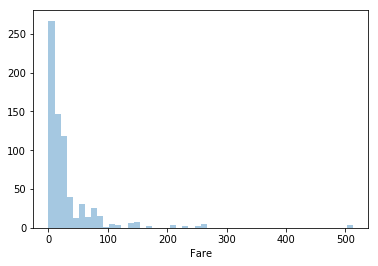

In [42]:
sns.distplot(train['Fare'], kde=False)
plt.show()

### Embarked

In [43]:
train['Embarked'].value_counts()

S    511
C    133
Q     66
Name: Embarked, dtype: int64

In [44]:
map_dict = {'S': 0, 'C': 1, 'Q': 2}

train['Embarked'] = train['Embarked'].map(map_dict)

Conclusão: mapear categorias para números.

### Ticket

In [45]:
train['Ticket'].value_counts()

3101295         6
382652          5
347082          5
CA. 2343        5
CA 2144         4
S.O.C. 14879    4
113781          4
1601            4
4133            3
PC 17755        3
PC 17760        3
LINE            3
24160           3
W./C. 6608      3
363291          3
349909          3
PC 17572        3
19950           3
371110          3
230080          3
C.A. 31921      3
29106           3
345773          3
347088          3
239853          3
110413          3
248727          3
2661            2
364849          2
347054          2
               ..
2697            1
3474            1
2686            1
7545            1
2625            1
347069          1
PC 17754        1
PC 17759        1
315089          1
350046          1
315082          1
28206           1
347468          1
29103           1
27267           1
SCO/W 1585      1
2620            1
13507           1
C 7075          1
347071          1
CA. 2314        1
4579            1
SC/AH 29037     1
11755           1
2671      

In [46]:
train = train.drop('Ticket', axis=1)

Conclusão: remover coluna.

## Obtendo insights baseados na variável de resposta

### Pclass

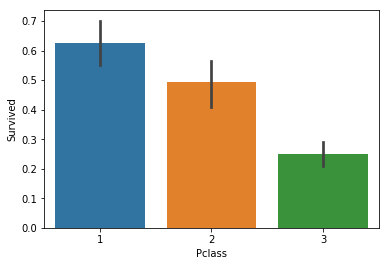

In [47]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.show()

Conclusão: mais alta a classe, maior a probabilidade de sobreviver.

### Sex

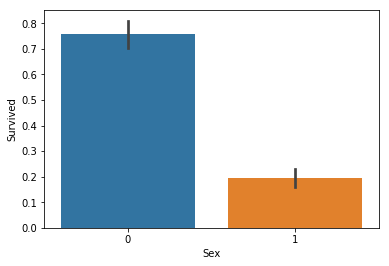

In [48]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.show()

Conclusão: mulheres tiveram maior probabilidade de sobreviver.

### Title

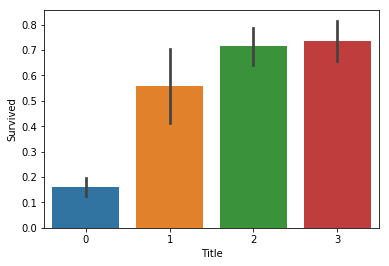

In [49]:
sns.barplot(x='Title', y='Survived', data=train)
plt.show()

Conclusão: para homens, o título importa para sobreviver, para mulheres não.

### Age

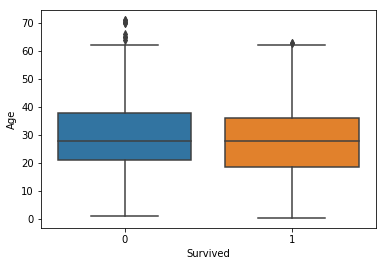

In [50]:
sns.boxplot(x='Survived', y='Age', data=train)
plt.show()

Conclusão: em geral, pessoas mais novas sobreviveram.

## Analisando valores faltantes

In [51]:
train.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.191011
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.769663
Embarked    0.002809
Title       0.000000
dtype: float64

### Variável Embarked

In [52]:
train['Embarked'].value_counts()

0.0    511
1.0    133
2.0     66
Name: Embarked, dtype: int64

In [53]:
train['Embarked'].mode()

0    0.0
dtype: float64

In [54]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

Conclusão: usamos moda para os valores faltantes.

### Variável Cabin

In [55]:
train = train.drop('Cabin', axis=1)

Conclusão: removemos a coluna.

### Variável Age

In [56]:
from sklearn.linear_model import Lasso

In [57]:
null_idx = train['Age'].isnull()

In [58]:
lasso = Lasso()

lasso.fit(y=train.loc[~null_idx, 'Age'], X=train.loc[~null_idx, ['Pclass', 'Sex']])

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
pred = lasso.predict(train.loc[null_idx, ['Pclass', 'Sex']])

In [60]:
train.loc[null_idx, 'Age'] = pred

Conclusão: usamos uma regressão linear para predizer os valores faltantes.

## Finalizando análise

In [61]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
331,0,1,1,45.500000,0,0,28.5000,0.0,0
828,1,3,1,25.312619,0,0,7.7500,2.0,0
677,1,3,0,18.000000,0,0,9.8417,0.0,2
741,0,1,1,36.000000,1,0,78.8500,0.0,0
392,0,3,1,28.000000,2,0,7.9250,0.0,0


O que temos: uma tabela reduzida, numérica.

# TO BE CONTINUED